In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

In [6]:
df = pd.read_csv('RequestForPayment/RequestForPayment_Results_k3_e1.csv', delimiter=';')
df2 = pd.read_csv('RequestForPayment/AStar_Timings_EXAMPLE.txt', delimiter=';')

In [7]:
# RequestForPayment Stats
file = open("RequestForPayment/RequestForPayment_traces.txt")
i = 0
event_length = 0

for line in file:
    i = i + 1
    event_length = event_length + len(line.split(" - "))
print("Number of traces: " + str(i))
print("Number of events: " + str(event_length))
print("Average events per trace: " + str(event_length / i))

Number of traces: 720
Number of events: 7272
Average events per trace: 10.1


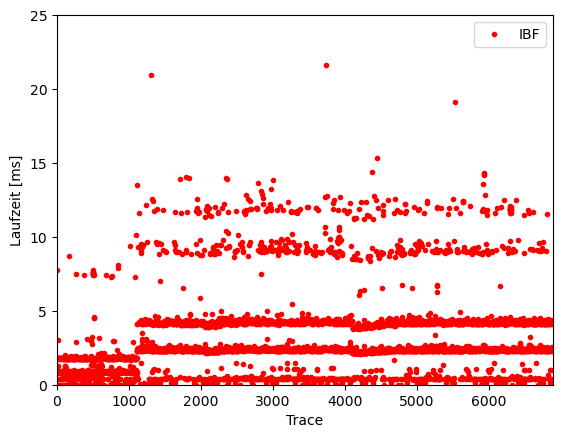

In [8]:
x1 = np.arange(0, 6886, 1)
x2 = np.arange(0, 6886, 1)
y1 = df["calculation time [ms]"]
y2 = df2["calculation time [ms]"];

plt.plot(x1, y1, '.', color='r', label='IBF')
#plt.plot(x2, y2, '.', color='g', label='A*')

plt.ylim(top=25, bottom=0)
plt.xlim(left=0, right=6886)

plt.xlabel('Trace')
#plt.ylabel('calculation time [ms]')
plt.ylabel('Laufzeit [ms]')

plt.legend()

plt.show()

In [9]:
df = pd.read_csv('DomesticDeclarations/DomesticDeclarations_Results_k2_e0.csv', delimiter=';')
df2 = pd.read_csv('DomesticDeclarations/AStar_Timings_EXAMPLE.txt', delimiter=';')

In [10]:
# DomesticDeclarations Stats
file = open("DomesticDeclarations/DomesticDeclarations_traces.txt")
i = 0
event_length = 0

for line in file:
    i = i + 1
    event_length = event_length + len(line.split(" - "))
print("Number of traces: " + str(i))
print("Number of events: " + str(event_length))
print("Average events per trace: " + str(event_length / i))

Number of traces: 582
Number of events: 5361
Average events per trace: 9.211340206185566


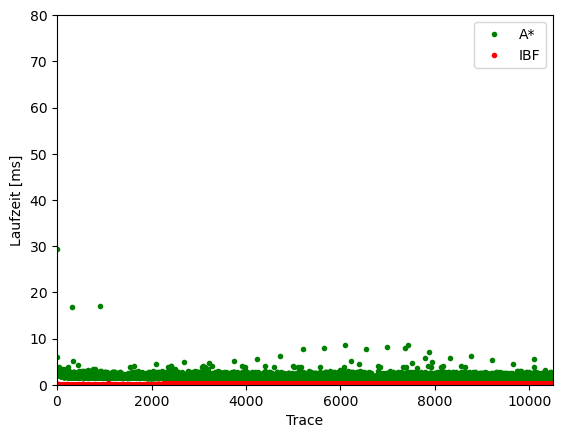

In [11]:
x1 = np.arange(0, 10500, 1)
x2 = np.arange(0, 10500, 1)
y1 = df["calculation time [ms]"]
y2 = df2["calculation time [ms]"]

plt.plot(x2, y2, '.', color='g', label='A*')
plt.plot(x1, y1, '.', color='r', label='IBF')

plt.ylim(top=80, bottom=0)
plt.xlim(left=0, right=10500)

#plt.xlabel('trace')
plt.xlabel('Trace')
#plt.ylabel('calculation time [ms]')
plt.ylabel('Laufzeit [ms]')

plt.legend()

plt.show()

In [14]:
# just for time measurement
# average index-based Conformance Checking

df = pd.read_csv('RequestForPayment/RequestForPayment_Results_k3_e1.csv', delimiter=';')
#df = pd.read_csv('DomesticDeclarations/DomesticDeclarations_Results_k3_e1.csv', delimiter=';')

df_astar = pd.read_csv('RequestForPayment/AStar_Timings_EXAMPLE.txt', delimiter=';')
#df_astar = pd.read_csv('DomesticDeclarations/AStar_Timings_EXAMPLE.txt', delimiter=';')

calculation_time_ibf_before = 0
calculation_time_ibf_after = 0

calculation_time_astar_before = 0
calculation_time_astar_after = 0

threshpoint = 1108

for index, row in df.iterrows():
    if (index + 1 <= threshpoint):
        calculation_time_ibf_before = calculation_time_ibf_before + row["calculation time [ms]"]
    else:
        calculation_time_ibf_after = calculation_time_ibf_after + row["calculation time [ms]"]

for index, row in df_astar.iterrows():
    if (index + 1 <= threshpoint):
        calculation_time_astar_before = calculation_time_astar_before + row["calculation time [ms]"]
    else:
        calculation_time_astar_after = calculation_time_astar_after + row["calculation time [ms]"]

print("IBF:")
print("<= " + str(threshpoint) + " -> " + str(calculation_time_ibf_before / threshpoint))
print(">  " + str(threshpoint) + " -> " + str(calculation_time_ibf_after / (df.shape[0] - threshpoint)))

print("\nA*:")
print("<= " + str(threshpoint) + " -> " + str(calculation_time_astar_before / threshpoint))
print(">  " + str(threshpoint) + " -> " + str(calculation_time_astar_after / (df_astar.shape[0] - threshpoint)))

IBF:
<= 1108 -> 1.258173285198556
>  1108 -> 3.3897826237452375

A*:
<= 1108 -> 2.068410649819493
>  1108 -> 1.8480944963655181


In [15]:
# show number of trace variants in file
trace_variants = set()

#file = open("thesis/RequestForPayment/RequestForPayment_search.txt")
file = open("DomesticDeclarations/DomesticDeclarations_search.txt")

line_count = 0

for line in file:
    trace_variants.add(line)
    line_count = line_count + 1

print(len(trace_variants))
print(line_count)

99
10500


In [18]:
df = pd.read_csv('RequestForPayment/RequestForPayment_Results_k3_e0.csv', delimiter=';')

# calculate number of found alignments
event_count = 0
fit_events = 0

for index, row in df.iterrows():
    if (row["levenshtein distance"] >= 0):
        fit_events += 1
    event_count += 1

print("Number of traces: " + str(event_count))
print("Number of alignments: " + str(fit_events))
print("% found optimal alignments: " + str(fit_events / event_count))

Number of traces: 6886
Number of alignments: 5356
% found optimal alignments: 0.7778100493755445


In [19]:
df = pd.read_csv('RequestForPayment/RequestForPayment_Results_k3_e0.csv', delimiter=';')

# calculate search time
search_time = 0

for index, row in df.iterrows():
    search_time += row["calculation time [ms]"]

print("Search time: " + str(search_time))

Search time: 537.9489999999996
